# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [15]:
import pandas as pd

df_flights = pd.read_csv('flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    R - Identify any null or missing data, and impute appropriate replacement values.
    R - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    R - View summary statistics for the numeric fields in the dataset.
    R - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        R - *What are the average (mean) departure and arrival delays?*
        R - *How do the carriers compare in terms of arrival delay performance?*
        R - *Is there a noticable difference in arrival delays for different days of the week?*
        R - *Which departure airport has the highest average departure delay?*
        * - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        * - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        R - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.


In [16]:
# ¿Hay valores nulos en el dataset?
# Verificar si hay valores nulos
print(df_flights.isnull().sum())

# ¿Cómo tratar los valores nulos en las columnas de retrasos?
# Reemplazar valores nulos en las columnas de retrasos con 0 (asumiendo que si está vacío, no hubo retraso)
df_flights['DepDelay'].fillna(0, inplace=True)
df_flights['ArrDelay'].fillna(0, inplace=True)

# O eliminar filas con valores nulos
df_flights.dropna(inplace=True)


Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24768\1772435072.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_flights['DepDelay'].fillna(0, inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24768\1772435072.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [17]:
# ¿Existen valores atípicos en los retrasos extremos?
# Definir un umbral para los retrasos, por ejemplo, eliminar vuelos con retrasos mayores a 1,000 minutos
df_flights = df_flights[df_flights['DepDelay'] <= 1000]
df_flights = df_flights[df_flights['ArrDelay'] <= 1000]


           Year          Month     DayofMonth      DayOfWeek  OriginAirportID  \
count  269170.0  269170.000000  269170.000000  269170.000000    269170.000000   
mean     2013.0       6.983921      15.817413       3.902370     12744.752632   
std         0.0       1.983862       8.805969       1.989297      1501.945919   
min      2013.0       4.000000       1.000000       1.000000     10140.000000   
25%      2013.0       5.000000       8.000000       2.000000     11292.000000   
50%      2013.0       7.000000      16.000000       4.000000     12892.000000   
75%      2013.0       9.000000      23.000000       6.000000     14057.000000   
max      2013.0      10.000000      31.000000       7.000000     15376.000000   

       DestAirportID     CRSDepTime       DepDelay       DepDel15  \
count  269170.000000  269170.000000  269170.000000  269170.000000   
mean    12739.446807    1324.417799      10.414225       0.201107   
std      1503.517863     470.760283      35.078076       0.4008

array([[<Axes: title={'center': 'DepDelay'}>,
        <Axes: title={'center': 'ArrDelay'}>]], dtype=object)

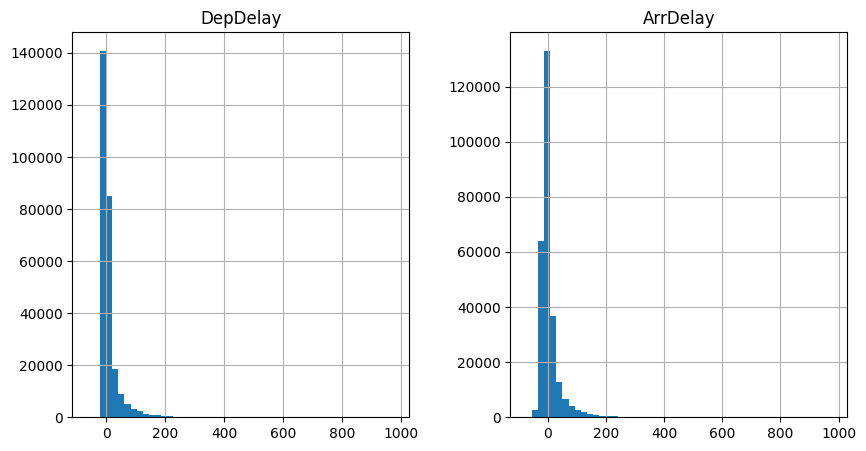

In [18]:
# ¿Cuáles son las estadísticas descriptivas generales del dataset?
# Ver estadísticas descriptivas de las columnas numéricas
print(df_flights.describe())

# ¿Cuál es la distribución de los retrasos de salida y llegada?
# Ver la distribución de los retrasos de salida y llegada
df_flights[['DepDelay', 'ArrDelay']].hist(bins=50, figsize=(10, 5))


In [19]:
# ¿Cuál es el retraso promedio de salida y llegada?
avg_dep_delay = df_flights['DepDelay'].mean()
avg_arr_delay = df_flights['ArrDelay'].mean()

print(f"Retraso promedio de salida: {avg_dep_delay:.2f} minutos")
print(f"Retraso promedio de llegada: {avg_arr_delay:.2f} minutos")


Retraso promedio de salida: 10.41 minutos
Retraso promedio de llegada: 6.52 minutos


In [20]:
# ¿Cuál es el retraso promedio por aerolínea?
# Agrupar por aerolínea y calcular el retraso promedio de llegada
carrier_arr_delay = df_flights.groupby('Carrier')['ArrDelay'].mean().sort_values()

print("Retraso promedio por aerolínea:")
print(carrier_arr_delay)


Retraso promedio por aerolínea:
Carrier
AS    -0.129887
HA     0.820458
DL     2.420039
US     4.040999
UA     4.885221
9E     5.256995
OO     6.153706
AA     7.096886
FL     7.662590
YV     8.033918
WN     8.114542
VX     9.464629
B6     9.875243
EV    10.388515
F9    11.469873
MQ    13.502385
Name: ArrDelay, dtype: float64


In [21]:
# ¿Existe una diferencia notable en los retrasos de llegada según el día de la semana?
# Agrupar por día de la semana y calcular el retraso promedio de llegada
day_of_week_mapping = {
    1: 'Lunes',
    2: 'Martes',
    3: 'Miércoles',
    4: 'Jueves',
    5: 'Viernes',
    6: 'Sábado',
    7: 'Domingo'
}

# Calcular el retraso promedio y renombrar los índices
dayofweek_arr_delay = df_flights.groupby('DayOfWeek')['ArrDelay'].mean().rename(index=day_of_week_mapping)

print("Retraso promedio por día de la semana:")
print(dayofweek_arr_delay)


Retraso promedio por día de la semana:
DayOfWeek
Lunes         6.784885
Martes        4.293584
Miércoles     7.022472
Jueves       10.827256
Viernes       8.525479
Sábado        2.152108
Domingo       4.998399
Name: ArrDelay, dtype: float64


In [22]:
# ¿Cuál es el aeropuerto de origen con mayor retraso promedio en la salida?
# Agrupar por aeropuerto de origen y calcular el retraso promedio de salida
origin_airport_dep_delay = df_flights.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False)

print("Aeropuerto con mayor retraso promedio en la salida:")
print(origin_airport_dep_delay.head(1))


Aeropuerto con mayor retraso promedio en la salida:
OriginAirportName
Chicago O'Hare International    16.656477
Name: DepDelay, dtype: float64


In [23]:
# ¿Las salidas tardías tienden a provocar mayores retrasos en la llegada?
# Comparar vuelos con salidas tardías (> 15 minutos de retraso) y su retraso en la llegada
late_departures = df_flights[df_flights['DepDelay'] > 15]
late_vs_ontime_arr_delay = late_departures.groupby('DepDelay')['ArrDelay'].mean()

print("Comparación de llegadas según salidas tardías:")
print(late_vs_ontime_arr_delay)


Comparación de llegadas según salidas tardías:
DepDelay
16      12.310804
17      12.900165
18      13.878944
19      13.740293
20      16.388288
          ...    
831    811.000000
865    852.000000
914    907.000000
970    960.000000
977    977.000000
Name: ArrDelay, Length: 473, dtype: float64


In [24]:
# ¿Cuál es la ruta con más llegadas tarde?
# Crear una columna de ruta combinando aeropuerto de origen y destino
df_flights['Route'] = df_flights['OriginAirportName'] + " -> " + df_flights['DestAirportName']

# Filtrar vuelos con llegadas tarde (> 15 minutos de retraso)
late_arrivals = df_flights[df_flights['ArrDelay'] > 15]

# Agrupar por ruta y contar las llegadas tarde
late_arrivals_by_route = late_arrivals['Route'].value_counts()

print("Ruta con más llegadas tarde:")
print(late_arrivals_by_route.head(1))


Ruta con más llegadas tarde:
Route
Los Angeles International -> San Francisco International    286
Name: count, dtype: int64


In [25]:
# ¿Cuál es la ruta con mayor retraso promedio en la llegada?
# Agrupar por ruta y calcular el retraso promedio de llegada
avg_arr_delay_by_route = df_flights.groupby('Route')['ArrDelay'].mean().sort_values(ascending=False)

print("Ruta con mayor retraso promedio en la llegada:")
print(avg_arr_delay_by_route.head(1))


Ruta con mayor retraso promedio en la llegada:
Route
Southwest Florida International -> Denver International    81.0
Name: ArrDelay, dtype: float64


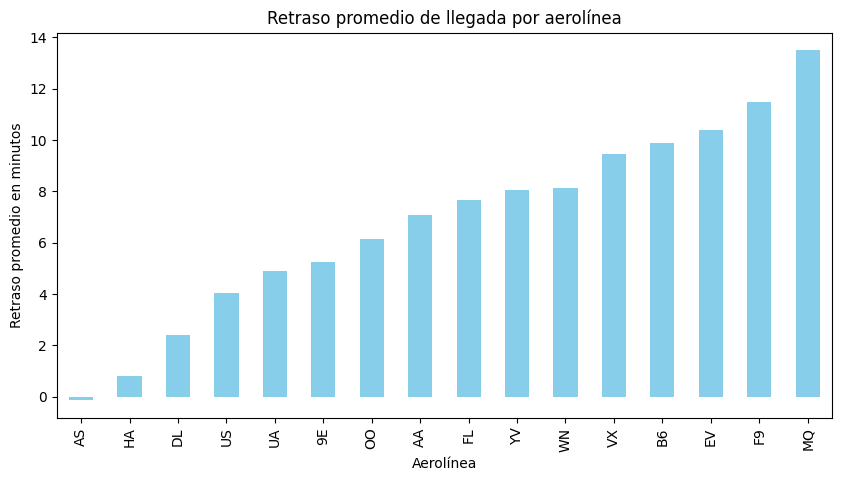

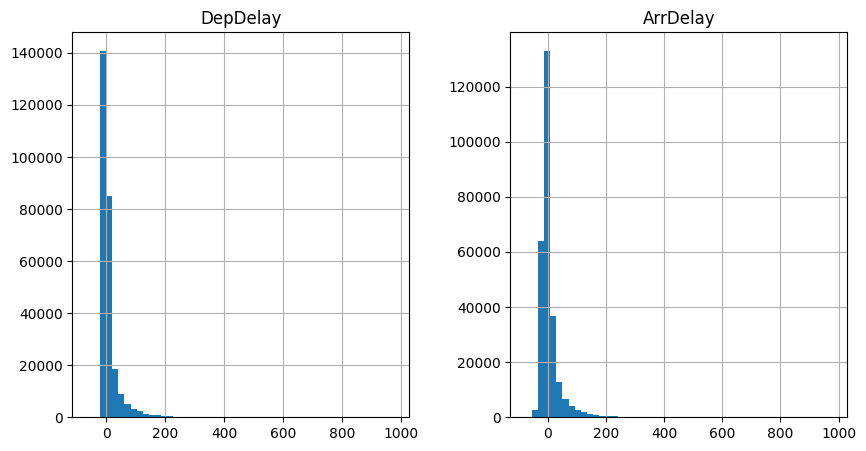

In [26]:
import matplotlib.pyplot as plt

# ¿Cómo se visualiza el retraso promedio por aerolínea?
# Gráfico de barras para retraso promedio por aerolínea
carrier_arr_delay.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Retraso promedio de llegada por aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Retraso promedio en minutos')
plt.show()

# ¿Cómo es la distribución de los retrasos de salida y llegada?
# Histograma de los retrasos de salida y llegada
df_flights[['DepDelay', 'ArrDelay']].hist(bins=50, figsize=(10, 5))
plt.show()
